---
# Galaxy collision
---

### Introduction
The Milky Way and Andromeda galaxy, which are the largest galaxies in the Local Group, are currently set on a collision course. 
The local group is gravitationally bound so the merger between the two galaxies is unavoidable, but there is still a lot of uncertainty about the orbit of the two galaxies and, as a consequence, about the time of merger. I ran three simulations for different initial relative velocities and studied the evolution of the separation between the two galaxies to determine the time of merger.

### Initial conditions
I simulated the collision between two non-rotating galaxies of equal mass and density profile, moving at a relative radial speed of v$_{rad}$ = 120 km/s with an initial separation of R$_{sep}$ = 780 kpc, which are the values measured for the Milky Way and the closest galaxy, Andromeda.
There is still a large uncertainty on the measure of the tangential velocity, so I ran three simulations for different values of it to study its effect on the outcome of the collision.

Each galaxy is modeled only by its dark matter halo with 10$^4$ unphysical particles of equal mass, distributed according to the Navarro-Frenk-White density profile, which is defined by two independent parameters: c and R$_200$. The velocities are Maxwellian-distributed, with dispersion depending on the distance from the center of the galaxy.

I set the reference frame with center of mass at rest in the origin of the coordinates. The orbit of the two galaxies lays in the x-y plane, with initial velocity along the x axis. 

simulation parametres        |                         |                       |  
:----------------------------|:-----------------------:|:---------------------:|
number of particles          | N                       |    20 000                   |
concentration parameter      | c                       |    12                       |  
virial radius                | R$_{200}$  \[ kpc \]         |    220                      |  
total mass                   | M$_{200}$  \[ M$_{\odot}$ \] |   1.13$\,\cdot\,$10$^{12}$ |  
initial separation           | R$_{sep}$  \[ kpc \]         |    780                      |  
initial radial velocity      | v$_{rad}$  \[ km/s \]      |    120                      |  
initial tangential velocity  | v$_{tan}$  \[ km/s \]       |  <font color=gray>run A:  </font> 17 <br> <font color=gray>run B:  </font> 57 <br> <font color=gray>run C:  </font> 92        |
total integration time       | t  \[ Gyr \]                 |<font color=gray>run A:   </font>  8 <br> <font color=gray>run B:  </font> 13 <br> <font color=gray>run C:  </font> 20         | 

### Simulations
For the initial tangential velocities of 17 km/s and 57 km/s (run A and B), the merger happens within the total integration time of the simulation. For the largest value of v$_{tan}$ (run C) the merger doesn't happen before 20 Gyr but it will happen in the future, since the system is gravitationally bound. 

The movies below show the projection on the x-y plane of the positions of the particles forming the two galaxies. They are played at increasing speed, from left to right, to show the merger or the end of the simulation in a reasonable amount time. 

v$_{tan}$ = 17 km/s | v$_{tan}$ = 57 km/s | v$_{tan}$ = 92 km/s
:---: | :---: | :---: 
![alt](v17_cut.gif) | ![alt](v57_cut.gif) | ![alt](v92_cut.gif)  |

### Separation between the two galaxies

For every collision I studied the evolution in time of the separation between the centers of mass of the two galaxies, which is plotted with a dashed line in **Fig.1**. 
For the largest tangential velocity (run C) the graph corresponds to what is seen in the movie: the distance between the two galaxies keeps increasing after the first close passage. For run A and B it is clear that the merger has happened by the end of the simulation, since the density centers of the two galaxies are no longer distinguishable, however the separation between the centers of mass remains stable at a value around 200 kpc. 

This happens because the highly eccentric orbit set with the initial conditions leads to the formation of two large tidal tails after the first close encounter, which are also visible in the movies above. As a result, the center of mass of each galaxy shifts outward towards the tails and it is no longer representative of the density center. This is highlighted in **Fig.2**, which shows the positions of the two galaxies and their centers of mass at end of the simulation for run B. The same happens for run A, even if it's not shown. 

I considered the separation between the density centers instead, starting from 1 Gyr before the first close passage. The result is plotted with a continuous line in **Fig.1**. This allowed to find the actual separation between the two galaxies and to estimate the time of merger.

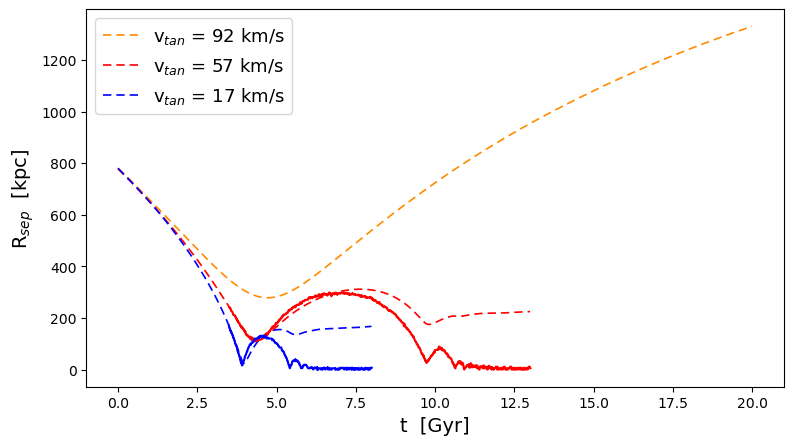

In [5]:
#[Figure 1]: separation between the centers of mass () and density centers of the two galaxies
import numpy as np
import matplotlib.pyplot as plt

dDelta=0.01 #time array
Nfiles17=800
t17=np.arange(0, dDelta*Nfiles17, dDelta )
Nfiles57=1300
t57=np.arange(0, dDelta*Nfiles57, dDelta )
Nfiles92=2000
t92=np.arange(0, dDelta*Nfiles92, dDelta )

 #read cm data
fname17 = open('cm_positionsv17','r')
sep17 = np.genfromtxt(fname17, dtype="float", comments="#", usecols=(6), unpack=True)
fname57 = open('cm_positionsv57','r')    
sep57 = np.genfromtxt(fname57, dtype="float", comments="#", usecols=(6), unpack=True)
fname92 = open('cm_positionsv92','r')    
sep92 = np.genfromtxt(fname92, dtype="float", comments="#", usecols=(6), unpack=True)  
  
 #read density center data   
f17 = open('1dens5kpc_v17','r')
t_17,x1_17,y1_17, z1_17, x2_17, y2_17, z2_17 = np.genfromtxt(f17, dtype="float", comments="#", usecols=(0,1,2,3,4,5,6), unpack=True)   
f57 = open('1dens5kpc_v57','r')
t_57,x1_57,y1_57, z1_57, x2_57, y2_57, z2_57 = np.genfromtxt(f57, dtype="float", comments="#", usecols=(0,1,2,3,4,5,6), unpack=True)  
sep_17=np.sqrt((x1_17-x2_17)**2+(y1_17-y2_17)**2+(z1_17-z2_17)**2)  
sep_57=np.sqrt((x1_57-x2_57)**2+(y1_57-y2_57)**2+(z1_57-z2_57)**2) 
   
 #PLOT 
plt.figure(figsize=(9,5), dpi=100)
plt.plot(t92,sep92, c='darkorange', linestyle='-.', dashes=(5,3), linewidth=1.2)
plt.plot(t57,sep57, 'r-.',  dashes=(5,3),linewidth=1.2)
plt.plot(t17,sep17, 'b-.',  dashes=(5,3), linewidth=1.2)

plt.plot(t_57,sep_57, 'r-') 
plt.plot(t_17,sep_17, 'b-') 

plt.xlabel("t  [Gyr]", fontsize=14)
plt.ylabel("R$_{sep}$  [kpc]", fontsize=14)
plt.legend(('v$_{tan}$ = 92 km/s', 'v$_{tan}$ = 57 km/s','v$_{tan}$ = 17 km/s' ), fontsize=13)
plt.show()

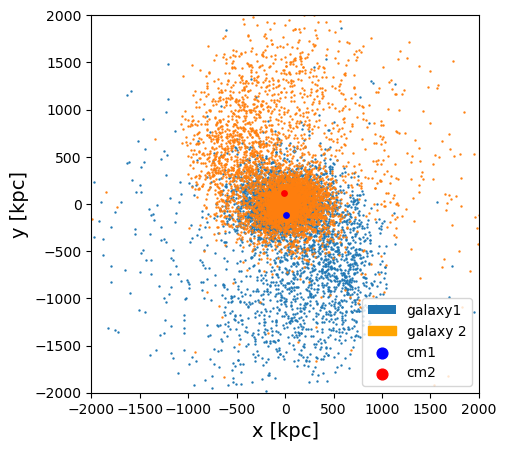

In [7]:
#[Figure 2]: projection on the x-y plane of the two galaxies at the end of the simulation (t = 13 Gyr)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fname = open('v57_end_positions..dat','r')  
x,y,z = np.genfromtxt(fname, dtype="float", comments="#", usecols=(0,1,2), unpack=True)

m=504.027         #single particle mass
Mgal=m*len(x)/2   #mass of 1 galaxy (len(x)=Npart=1e4)
Mtot=m*len(x)

x1, x2 = np.split(x,2)
y1, y2 = np.split(y,2)
z1, z2 = np.split(z,2)

xcm1=sum(m*x1)/Mgal #CM of the two galaxies
ycm1=sum(m*y1)/Mgal
zcm1=sum(m*z1)/Mgal 
xcm2=sum(m*x2)/Mgal
ycm2=sum(m*y2)/Mgal
zcm2=sum(m*z2)/Mgal

#plot 
plt.figure(figsize=(5,5), dpi=100) #positions of the particles
plt.scatter(x1,y1, s=0.5)
plt.scatter(x2,y2, s=0.5)

p1=plt.scatter(xcm1, ycm1, s=15, c='blue') #ceneter of mass
p2 =plt.scatter(xcm2, ycm2, s=15, c='red')

plt.xlabel("x [kpc]" , fontsize=14)
plt.ylabel("y [kpc]" , fontsize=14)
box=2000.
plt.xlim(-box, box)
plt.ylim(-box, box)

patch1 = mpatches.Patch()
patch2 = mpatches.Patch( color='orange')
plt.legend(handles=[patch1, patch2, p1, p2], labels=['galaxy1', 'galaxy 2', 'cm1', 'cm2'] , fontsize=10, markerscale=2, loc='lower right')

#plt.rcParams['figure.dpi'] = 300
plt.show()

### Merger
I considered the time of merger as the time at which the separation between the centers of density of the two galaxies fell below 10 kpc, which is less than 5% of the initial radius of the galaxies, and remained stable below that value. I verified that the two density centers were no longer distinguishable by that time and that the a single radial density profile peaked in the center of mass of the entire system had formed. The time of merger depends very strongly on the initial tangential velocity, covering a range of several Gyr. 

v$_{tan}$(km/s) |t$_{merg}$(km/s) |
:-----:|:----:|
17|  6.0  |
57|  10.9 |
92|  > 20 | 

---
## CODE

- The initial conditions file was written with the script [2nfw.py](2nfw.py)
- All the plots were obtained from the positions of the particles at each time-step, obtained with TIPSY by reading the Gasoline output files. To repeat this operation several times I used a TIPSY macro written with the python script [ma_pos.py](ma_pos.py).
- I obtained the movies by combining one image obtained with TIPSY for each time-step, using the TIPSY macro written with [ma_img.py](ma_img.py).
- I found the position of the center of mass and center of density at each time-step with the scripts [write_cm.py](write_cm.py) and [write_dens.py](write_dens.py)

### Density center
I found the center of density with a non rigorous but quite fast method, exploiting the fact that in this specific case all particles have the same mass and the spherical symmetry of the density distribution is maintained to a certain extent around the density center of the two galaxies. 

I considered a cube centered on the center of mass of the entire system and large enough to include the density centers of the two galaxies. I divided it into cubic bins with a 5 kpc side, chosen large enough in order to avoid spurious density fluctuations. Using the data with the particles positions at a certain time, I plot a histogram with the number of particles in each bin, separately for the coordinates x,y and z, and I took the center of the bin with the maximum number of particles as the coordinate for the density maximum. I repeated the operation for several time-steps to follow the trajectory of the density maximum in time. The following code shows this operation for the x coordinate. The full code is contained in the [write dens.py](write_dens.py) file.

```python
box = 100.        #half side of the cube
Nbin= 20          #bin number (for the half side)
width = box/Nbin  #bin width, in kpc

hx1, binx1 = np.histogram(x1, 2*Nbin, range=(-box,box))  #from galaxy 1 data
hx2, binx2 = np.histogram (x2, 2*Nbin, range=(-box,box)) #from galaxy 2 data 
ix1 = np.argmax(hx1)  #index of the bin with the maximum number of particles
ix2 = np.argmax(hx2)  

posx1 = binx1[ix1]+0.5*width  #center of that bin, in kpc
posx2 = binx2[ix2]+0.5*width
```